In [ ]:
!pip install scikit-learn==1.3.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 25.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
sns.set()
plt.style.use('ggplot')
%matplotlib inline

In [ ]:
df  = pd.read_csv('/content/kidney_disease.csv')
df.head(10)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [ ]:
df["classification"].value_counts()

classification
ckd       248
notckd    150
ckd\t       2
Name: count, dtype: int64

In [ ]:
df.shape

(400, 26)

In [ ]:
df.drop("id", axis=1, inplace=True)

In [ ]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
df.columns = ['Age', 'Blood Pressure', 'Specific Gravity', 'Albumin', 'Sugar',
              'Red Blood Cells', 'Pus Cell', 'Pus Cell Clumps', 'Bacteria',
              'Blood Glucose Random', 'Blood Urea', 'Serum Creatinine', 'Sodium',
              'Potassium', 'Hemoglobin', 'Packed Cell Volume', 'White Blood Cell Count',
              'Red Blood Cell Count', 'Hypertension', 'Diabetes Mellitus',
              'Coronary Artery Disease', 'Appetite', 'Pedal Edema', 'Anemia',
              'Classification']

In [ ]:
df.head()

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell Clumps,Bacteria,Blood Glucose Random,...,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
df.describe()

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Blood Glucose Random,Blood Urea,Serum Creatinine,Sodium,Potassium,Hemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      391 non-null    float64
 1   Blood Pressure           388 non-null    float64
 2   Specific Gravity         353 non-null    float64
 3   Albumin                  354 non-null    float64
 4   Sugar                    351 non-null    float64
 5   Red Blood Cells          248 non-null    object 
 6   Pus Cell                 335 non-null    object 
 7   Pus Cell Clumps          396 non-null    object 
 8   Bacteria                 396 non-null    object 
 9   Blood Glucose Random     356 non-null    float64
 10  Blood Urea               381 non-null    float64
 11  Serum Creatinine         383 non-null    float64
 12  Sodium                   313 non-null    float64
 13  Potassium                312 non-null    float64
 14  Hemoglobin               3

In [ ]:
df["Packed Cell Volume"] = pd.to_numeric(df["Packed Cell Volume"], errors='coerce')
df["White Blood Cell Count"] = pd.to_numeric(df["White Blood Cell Count"], errors='coerce')
df["Red Blood Cell Count"] = pd.to_numeric(df["Red Blood Cell Count"], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      391 non-null    float64
 1   Blood Pressure           388 non-null    float64
 2   Specific Gravity         353 non-null    float64
 3   Albumin                  354 non-null    float64
 4   Sugar                    351 non-null    float64
 5   Red Blood Cells          248 non-null    object 
 6   Pus Cell                 335 non-null    object 
 7   Pus Cell Clumps          396 non-null    object 
 8   Bacteria                 396 non-null    object 
 9   Blood Glucose Random     356 non-null    float64
 10  Blood Urea               381 non-null    float64
 11  Serum Creatinine         383 non-null    float64
 12  Sodium                   313 non-null    float64
 13  Potassium                312 non-null    float64
 14  Hemoglobin               3

In [ ]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [ ]:
cat_cols

['Red Blood Cells',
 'Pus Cell',
 'Pus Cell Clumps',
 'Bacteria',
 'Hypertension',
 'Diabetes Mellitus',
 'Coronary Artery Disease',
 'Appetite',
 'Pedal Edema',
 'Anemia',
 'Classification']

In [ ]:
num_cols

['Age',
 'Blood Pressure',
 'Specific Gravity',
 'Albumin',
 'Sugar',
 'Blood Glucose Random',
 'Blood Urea',
 'Serum Creatinine',
 'Sodium',
 'Potassium',
 'Hemoglobin',
 'Packed Cell Volume',
 'White Blood Cell Count',
 'Red Blood Cell Count']

In [ ]:
for col in cat_cols:
    print(f'{col} : {df[col].unique()}')

Red Blood Cells : [nan 'normal' 'abnormal']
Pus Cell : ['normal' 'abnormal' nan]
Pus Cell Clumps : ['notpresent' 'present' nan]
Bacteria : ['notpresent' 'present' nan]
Hypertension : ['yes' 'no' nan]
Diabetes Mellitus : ['yes' 'no' ' yes' '\tno' '\tyes' nan]
Coronary Artery Disease : ['no' 'yes' '\tno' nan]
Appetite : ['good' 'poor' nan]
Pedal Edema : ['no' 'yes' nan]
Anemia : ['no' 'yes' nan]
Classification : ['ckd' 'ckd\t' 'notckd']


In [ ]:
# Replace specified values
df['Classification'] = df['Classification'].replace({'ckd\t': 'ckd', 'notckd': 'not ckd'})
df['Diabetes Mellitus'] = df['Diabetes Mellitus'].replace({'\tno': 'no', '\tyes': 'yes', ' yes': 'yes'})
df['Coronary Artery Disease'] = df['Coronary Artery Disease'].replace({'\tno': 'no'})

In [ ]:

# Display the unique values after replacement to verify
print(df['Classification'].unique())
print(df['Diabetes Mellitus'].unique())
print(df['Coronary Artery Disease'].unique())

['ckd' 'not ckd']
['yes' 'no' nan]
['no' 'yes' nan]


In [ ]:
cols = ['Diabetes Mellitus','Coronary Artery Disease','Classification']
for col in cols:
    print(f'{col} : {df[col].unique()}')

Diabetes Mellitus : ['yes' 'no' nan]
Coronary Artery Disease : ['no' 'yes' nan]
Classification : ['ckd' 'not ckd']


In [ ]:
df['Classification'] = df['Classification'].map({'ckd': 0, 'not ckd': 1})
df['Classification'] = pd.to_numeric(df['Classification'], errors='coerce')


In [ ]:
cols = ['Diabetes Mellitus','Coronary Artery Disease','Classification']
for col in cols:
    print(f'{col} : {df[col].unique()}')

Diabetes Mellitus : ['yes' 'no' nan]
Coronary Artery Disease : ['no' 'yes' nan]
Classification : [0 1]


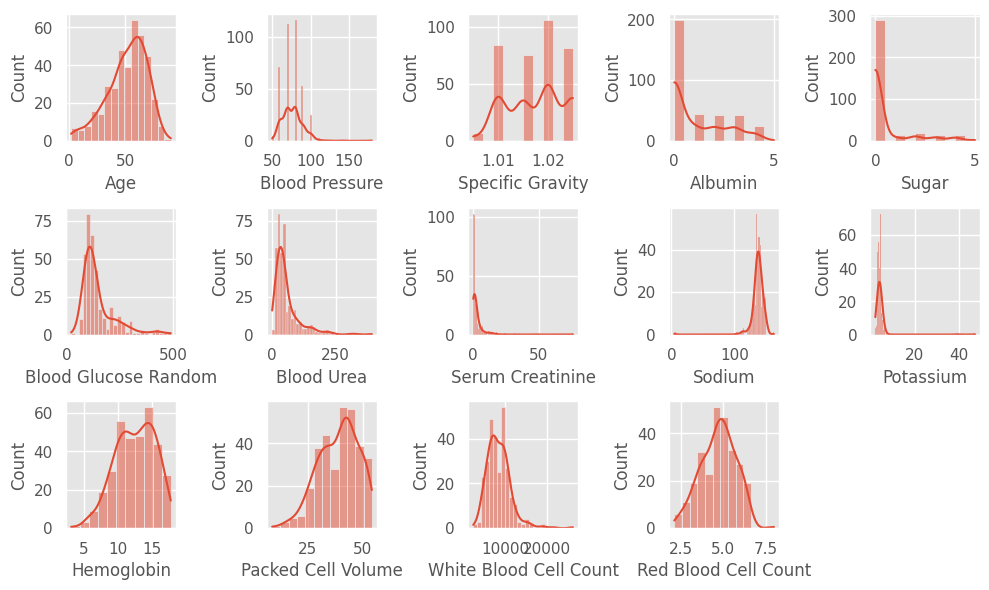

In [ ]:
plt.figure(figsize=(10, 6))

plotnumber = 1

for column in num_cols:
  if plotnumber <= 14:
    ax = plt.subplot(3, 5, plotnumber)
    sns.histplot(df[column], kde=True)
    plt.xlabel(column)
  plotnumber += 1
plt.tight_layout()
plt.show()

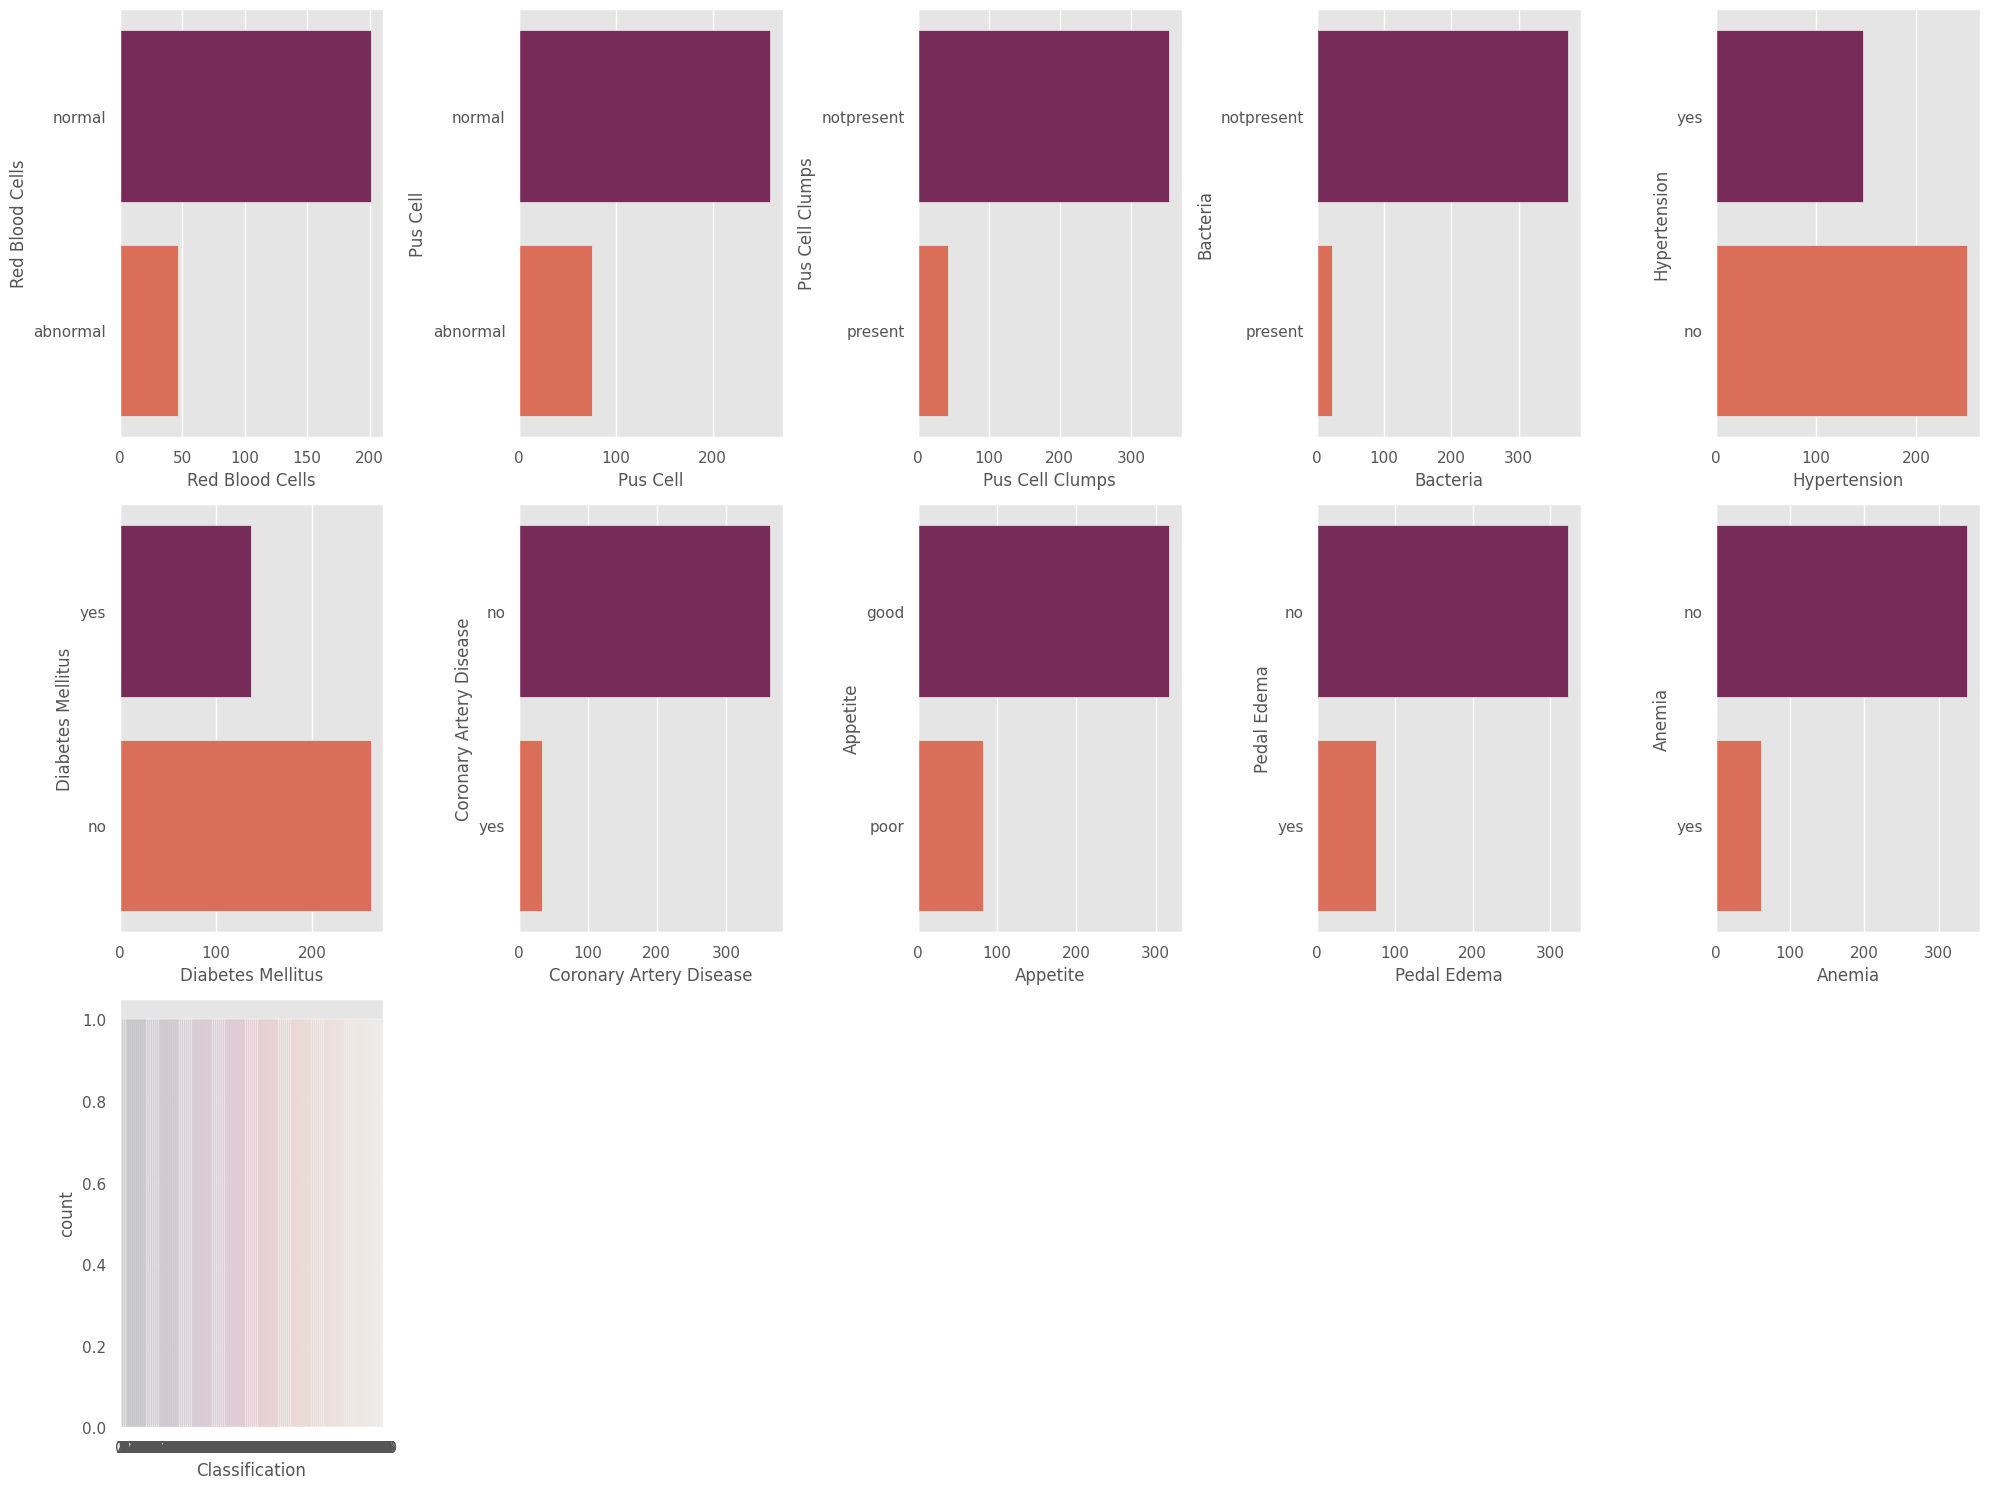

In [ ]:
plt.figure(figsize=(20, 15))

plotnumber = 1

for column in cat_cols:
  if plotnumber <= 14:
    ax = plt.subplot(3, 5, plotnumber)
    sns.countplot(df[column], palette = 'rocket')
    plt.xlabel(column)
  plotnumber += 1
plt.tight_layout()
plt.show()

In [ ]:
def voilin(col):
  fig  = px.violin(df, y=col, color='Classification', box=True, points='all', template='plotly_dark')
  fig.show()

def kde(col):
  grid = sns.FacetGrid(df, hue='Classification', height=6, aspect = 2)
  grid.map(sns.kdeplot, col)
  grid.add_legend()

def scatter_plot(col1, col2):
  fig = px.  scatter(df, x = col1, y = col2, color='Classification', template="plotly_dark")
  return fig.show()

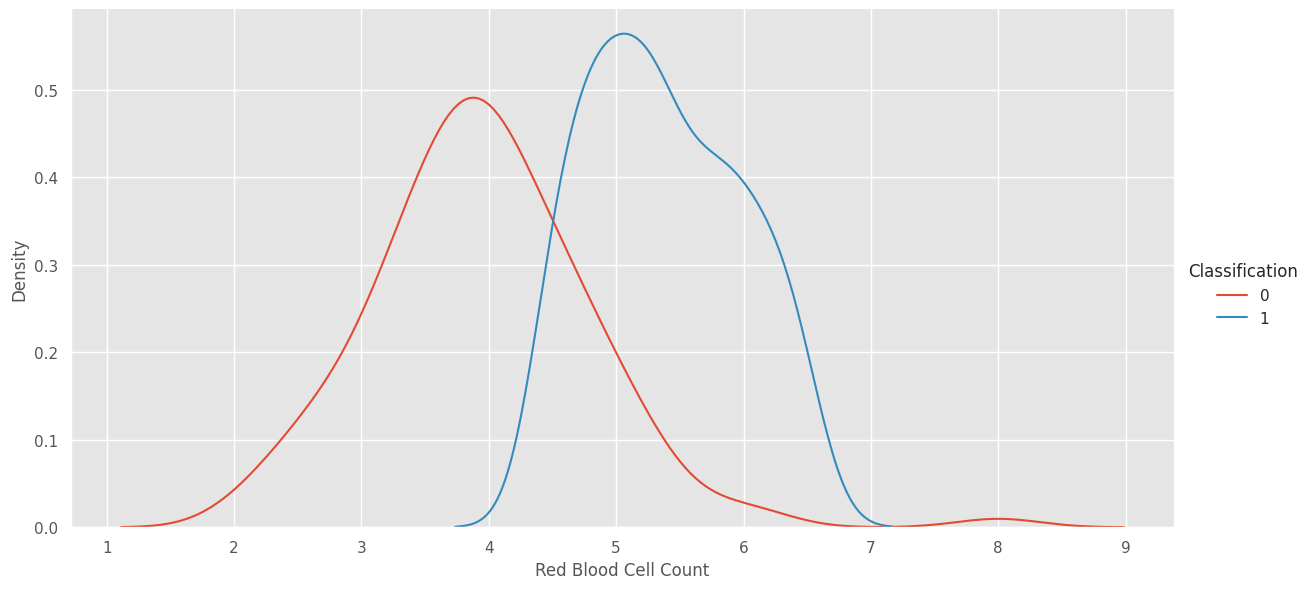

In [ ]:
kde("Red Blood Cell Count")

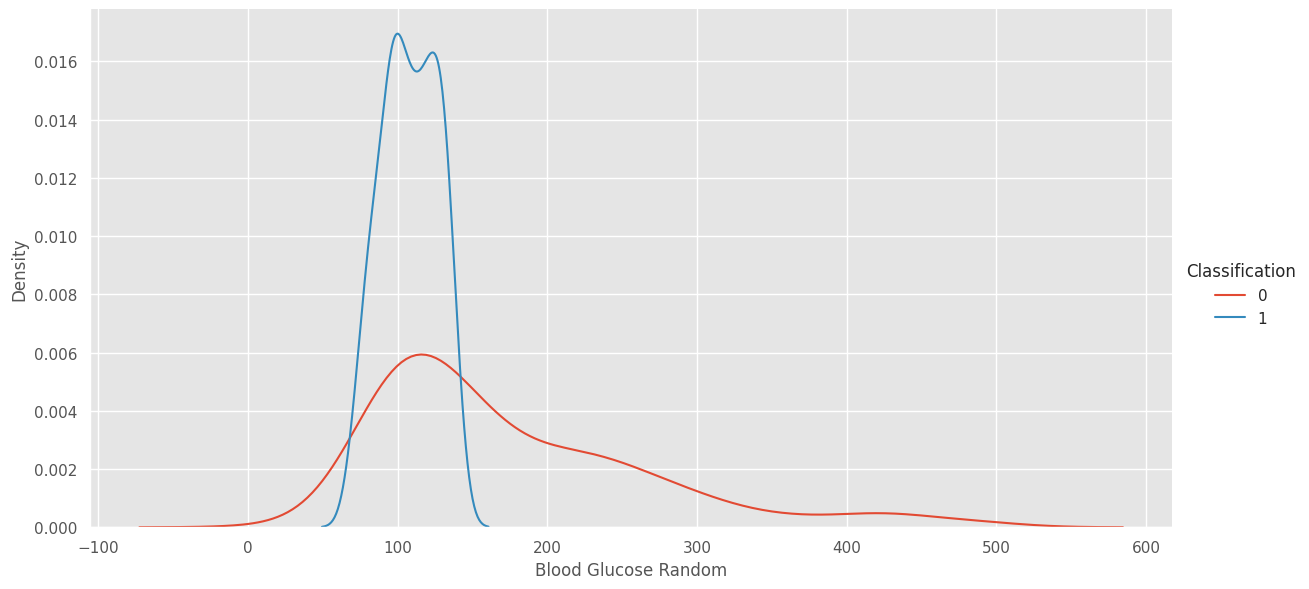

In [ ]:
kde("Blood Glucose Random")

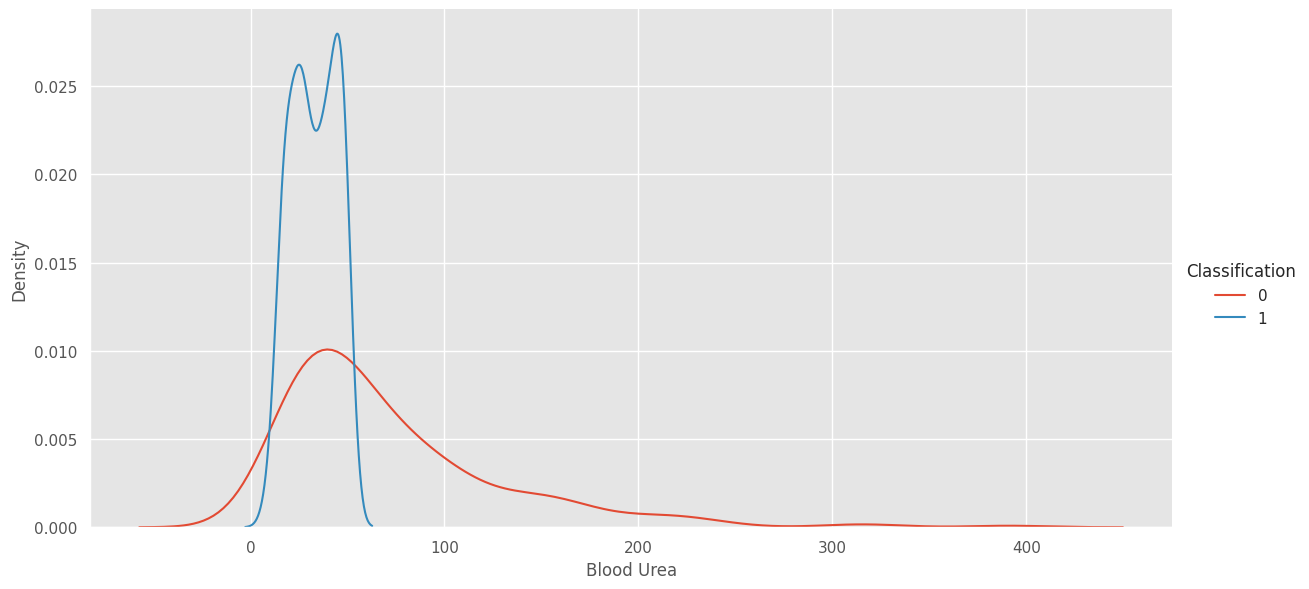

In [ ]:
kde("Blood Urea")

In [ ]:
voilin("Blood Urea")

In [ ]:
voilin("Blood Glucose Random")

In [ ]:
voilin("Red Blood Cell Count")

In [ ]:
scatter_plot("Blood Urea", "Blood Glucose Random")

In [ ]:
df.isnull().sum()

Age                          9
Blood Pressure              12
Specific Gravity            47
Albumin                     46
Sugar                       49
Red Blood Cells            152
Pus Cell                    65
Pus Cell Clumps              4
Bacteria                     4
Blood Glucose Random        44
Blood Urea                  19
Serum Creatinine            17
Sodium                      87
Potassium                   88
Hemoglobin                  52
Packed Cell Volume          71
White Blood Cell Count     106
Red Blood Cell Count       131
Hypertension                 2
Diabetes Mellitus            2
Coronary Artery Disease      2
Appetite                     1
Pedal Edema                  1
Anemia                       1
Classification               0
dtype: int64

In [ ]:
df.isnull().sum().sort_values(ascending=False)

Red Blood Cells            152
Red Blood Cell Count       131
White Blood Cell Count     106
Potassium                   88
Sodium                      87
Packed Cell Volume          71
Pus Cell                    65
Hemoglobin                  52
Sugar                       49
Specific Gravity            47
Albumin                     46
Blood Glucose Random        44
Blood Urea                  19
Serum Creatinine            17
Blood Pressure              12
Age                          9
Bacteria                     4
Pus Cell Clumps              4
Hypertension                 2
Diabetes Mellitus            2
Coronary Artery Disease      2
Appetite                     1
Pedal Edema                  1
Anemia                       1
Classification               0
dtype: int64

In [ ]:
df[num_cols].isnull().sum()

Age                         9
Blood Pressure             12
Specific Gravity           47
Albumin                    46
Sugar                      49
Blood Glucose Random       44
Blood Urea                 19
Serum Creatinine           17
Sodium                     87
Potassium                  88
Hemoglobin                 52
Packed Cell Volume         71
White Blood Cell Count    106
Red Blood Cell Count      131
dtype: int64

In [ ]:
df[cat_cols].isnull().sum()

Red Blood Cells            152
Pus Cell                    65
Pus Cell Clumps              4
Bacteria                     4
Hypertension                 2
Diabetes Mellitus            2
Coronary Artery Disease      2
Appetite                     1
Pedal Edema                  1
Anemia                       1
Classification               0
dtype: int64

In [ ]:
df.tail(20)

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell Clumps,Bacteria,Blood Glucose Random,...,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Classification
380,59.0,60.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,113.0,...,54.0,6500.0,4.9,no,no,no,good,no,no,1
381,71.0,70.0,1.025,0.0,0.0,NaN,NaN,notpresent,notpresent,79.0,...,40.0,5800.0,5.9,no,no,no,good,no,no,1
382,48.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,51.0,6000.0,6.5,no,no,no,good,no,no,1
383,80.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,119.0,...,49.0,5100.0,5.0,no,no,no,good,no,no,1
384,57.0,60.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,132.0,...,42.0,11000.0,4.5,no,no,no,good,no,no,1
385,63.0,70.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,113.0,...,52.0,8000.0,5.1,no,no,no,good,no,no,1
386,46.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,43.0,5700.0,6.5,no,no,no,good,no,no,1
387,15.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,93.0,...,50.0,6200.0,5.2,no,no,no,good,no,no,1
388,51.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,94.0,...,46.0,9500.0,6.4,no,no,no,good,no,no,1
389,41.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,112.0,...,52.0,7200.0,5.8,no,no,no,good,no,no,1


In [ ]:
# two methods
# random sampling --> higher null values
# mean/mode --> lower null values

In [ ]:
def random_sampling(feature):
  random_sample = df[feature].dropna().sample(df[feature].isna().sum())
  random_sample.index = df[df[feature].isnull()].index
  df.loc[df[feature].isnull(), feature] = random_sample


def impute_mode(feature):
  mode = df[feature].mode()[0]
  df[feature] = df[feature].fillna(mode)


In [ ]:
# random sampling for numerical values

for col in num_cols:
  random_sampling(col)

In [ ]:
df[num_cols].isnull().sum()

Age                       0
Blood Pressure            0
Specific Gravity          0
Albumin                   0
Sugar                     0
Blood Glucose Random      0
Blood Urea                0
Serum Creatinine          0
Sodium                    0
Potassium                 0
Hemoglobin                0
Packed Cell Volume        0
White Blood Cell Count    0
Red Blood Cell Count      0
dtype: int64

In [ ]:
random_sampling('Red Blood Cells')
random_sampling('Pus Cell')

for col in cat_cols:
  impute_mode(col)



In [ ]:
df[cat_cols].isnull().sum()

Red Blood Cells            0
Pus Cell                   0
Pus Cell Clumps            0
Bacteria                   0
Hypertension               0
Diabetes Mellitus          0
Coronary Artery Disease    0
Appetite                   0
Pedal Edema                0
Anemia                     0
Classification             0
dtype: int64

In [ ]:
# Feature Encoding

In [ ]:
for col in cat_cols:
  print(f'{col} : {df[col].nunique()}')

Red Blood Cells : 2
Pus Cell : 2
Pus Cell Clumps : 2
Bacteria : 2
Hypertension : 2
Diabetes Mellitus : 2
Coronary Artery Disease : 2
Appetite : 2
Pedal Edema : 2
Anemia : 2
Classification : 2


In [ ]:
# label Encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in cat_cols:
  df[col] = le.fit_transform(df[col])

In [ ]:
df.head()

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell Clumps,Bacteria,Blood Glucose Random,...,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Classification
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,248.0,...,38.0,6000.0,4.6,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,4.4,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0


In [ ]:
# Model Building

In [ ]:
X = df.drop('Classification', axis=1)
y = df['Classification']

In [ ]:
X

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell Clumps,Bacteria,Blood Glucose Random,...,Hemoglobin,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,15.4,44.0,7800.0,5.2,1,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,248.0,...,11.3,38.0,6000.0,4.6,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,9.6,31.0,7500.0,4.4,0,1,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,11.2,32.0,6700.0,3.9,1,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,11.6,35.0,7300.0,4.6,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.0,...,15.7,47.0,6700.0,4.9,0,0,0,0,0,0
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.0,...,16.5,54.0,7800.0,6.2,0,0,0,0,0,0
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.0,...,15.8,49.0,6600.0,5.4,0,0,0,0,0,0
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.0,...,14.2,51.0,7200.0,5.9,0,0,0,0,0,0


In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: Classification, Length: 400, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn_training_accuracy = accuracy_score(y_test, y_pred)
print("KNN Training Accuracy:", knn_training_accuracy)
knn_testing_accuracy = accuracy_score(y_test, y_pred)
print("KNN Testing Accuracy:", knn_testing_accuracy)
knn_confusion_matrix = confusion_matrix(y_test, y_pred)
print("KNN Confusion Matrix:\n", knn_confusion_matrix)
knn_classification_report = classification_report(y_test, y_pred)
print("KNN Classification Report:\n", knn_classification_report)



KNN Training Accuracy: 0.7
KNN Testing Accuracy: 0.7
KNN Confusion Matrix:
 [[38 14]
 [10 18]]
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.73      0.76        52
           1       0.56      0.64      0.60        28

    accuracy                           0.70        80
   macro avg       0.68      0.69      0.68        80
weighted avg       0.71      0.70      0.70        80



In [ ]:
# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
dt_training_accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Training Accuracy:", dt_training_accuracy)
dt_testing_accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Testing Accuracy:", dt_testing_accuracy)
dt_confusion_matrix = confusion_matrix(y_test, y_pred)
print("Decision Tree Confusion Matrix:\n", dt_confusion_matrix)
dt_classification_report = classification_report(y_test, y_pred)
print("Decision Tree Classification Report:\n", dt_classification_report)


Decision Tree Training Accuracy: 0.9875
Decision Tree Testing Accuracy: 0.9875
Decision Tree Confusion Matrix:
 [[52  0]
 [ 1 27]]
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        52
           1       1.00      0.96      0.98        28

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80



In [ ]:
# Random Tree

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
rf_training_accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Training Accuracy:", rf_training_accuracy)
rf_testing_accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Testing Accuracy:", rf_testing_accuracy)
rf_confusion_matrix = confusion_matrix(y_test, y_pred)
print("Random Forest Confusion Matrix:\n", rf_confusion_matrix)
rf_classification_report = classification_report(y_test, y_pred)
print("Random Forest Classification Report:\n", rf_classification_report)

Random Forest Training Accuracy: 0.9875
Random Forest Testing Accuracy: 0.9875
Random Forest Confusion Matrix:
 [[52  0]
 [ 1 27]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        52
           1       1.00      0.96      0.98        28

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80



In [ ]:
# Hyper Parameter Tunning

In [ ]:
from sklearn.model_selection import GridSearchCV

GRID_PARAMETER = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10],
    'splitter': ['best', 'random'],
    'min_samples_split': [1, 2, 3, 5, 7],
    'min_samples_leaf': [1, 2, 3, 5, 7],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search_dt = GridSearchCV(estimator=dt, param_grid=GRID_PARAMETER, cv=5, n_jobs=1, verbose=1)
grid_search_dt.fit(X_train, y_train)
best_params = grid_search_dt.best_params_
print("Best Parameters:", best_params)
best_score = grid_search_dt.best_score_
print("Best Score:", best_score)
best_estimator = grid_search_dt.best_estimator_
print("Best Estimator:", best_estimator)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 3, 'splitter': 'best'}
Best Score: 0.978125
Best Estimator: DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='log2',
                       min_samples_leaf=2, min_samples_split=3)


In [ ]:
dt = grid_search_dt.best_estimator_
dt.fit(X_train, y_train)



y_pred = dt.predict(X_test)
dt_training_accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Training Accuracy:", dt_training_accuracy)
dt_testing_accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Testing Accuracy:", dt_testing_accuracy)
dt_confusion_matrix = confusion_matrix(y_test, y_pred)
print("Decision Tree Confusion Matrix:\n", dt_confusion_matrix)
dt_classification_report = classification_report(y_test, y_pred)
print("Decision Tree Classification Report:\n", dt_classification_report)


Decision Tree Training Accuracy: 0.925
Decision Tree Testing Accuracy: 0.925
Decision Tree Confusion Matrix:
 [[46  6]
 [ 0 28]]
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.88      0.94        52
           1       0.82      1.00      0.90        28

    accuracy                           0.93        80
   macro avg       0.91      0.94      0.92        80
weighted avg       0.94      0.93      0.93        80



In [ ]:
from sklearn.model_selection import GridSearchCV

GRID_PARAMETER = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10],
    # 'splitter': ['best', 'random'],
    'min_samples_split': [1, 2, 3, 5, 7],
    'min_samples_leaf': [1, 2, 3, 5, 7],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search_rf = GridSearchCV(estimator=rf, param_grid=GRID_PARAMETER, cv=5, n_jobs=1, verbose=1)
grid_search_rf.fit(X_train, y_train)
best_params = grid_search_rf.best_params_
print("Best Parameters:", best_params)
best_score = grid_search_rf.best_score_
print("Best Score:", best_score)
best_estimator = grid_search_rf.best_estimator_
print("Best Estimator:", best_estimator)

In [ ]:
rf = grid_search_rf.best_estimator_
rf.fit(X_train, y_train)



rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
rf_training_accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Training Accuracy:", rf_training_accuracy)
rf_testing_accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Testing Accuracy:", rf_testing_accuracy)
rf_confusion_matrix = confusion_matrix(y_test, y_pred)
print("Random Forest Confusion Matrix:\n", rf_confusion_matrix)
rf_classification_report = classification_report(y_test, y_pred)
print("Random Forest Classification Report:\n", rf_classification_report)

In [ ]:
# XgBoost

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
xgb_training_accuracy = accuracy_score(y_test, y_pred)
print("XGBoost Training Accuracy:", xgb_training_accuracy)
xgb_testing_accuracy = accuracy_score(y_test, y_pred)
print("XGBoost Testing Accuracy:", xgb_testing_accuracy)
xgb_confusion_matrix = confusion_matrix(y_test, y_pred)
print("XGBoost Confusion Matrix:\n", xgb_confusion_matrix)
xgb_classification_report = classification_report(y_test, y_pred)
print("XGBoost Classification Report:\n", xgb_classification_report)

In [ ]:
from sklearn.model_selection import GridSearchCV

GRID_PARAMETER = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10],
    'splitter': ['best', 'random'],
    'min_samples_split': [1, 2, 3, 5, 7],
    'min_samples_leaf': [1, 2, 3, 5, 7],
    'max_features': ['auto', 'sqrt', 'log2'],
    'objective': ['binary:logistic'],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300]

}

grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=GRID_PARAMETER, cv=5, n_jobs=1, verbose=1)
grid_search_xgb.fit(X_train, y_train)
best_params = grid_search_xgb.best_params_
print("Best Parameters:", best_params)
best_score = grid_search_xgb.best_score_
print("Best Score:", best_score)
best_estimator = grid_search_xgb.best_estimator_
print("Best Estimator:", best_estimator)

In [ ]:
xgb = grid_search_xgb.best_estimator_
xgb.fit(X_train, y_train)


y_pred = xgb.predict(X_test)
xgb_training_accuracy = accuracy_score(y_test, y_pred)
print("XGBoost Training Accuracy:", xgb_training_accuracy)
xgb_testing_accuracy = accuracy_score(y_test, y_pred)
print("XGBoost Testing Accuracy:", xgb_testing_accuracy)
xgb_confusion_matrix = confusion_matrix(y_test, y_pred)
print("XGBoost Confusion Matrix:\n", xgb_confusion_matrix)
xgb_classification_report = classification_report(y_test, y_pred)
print("XGBoost Classification Report:\n", xgb_classification_report)

In [ ]:
import pickle
model = dt
filename = 'kidney_disease_2.pkl'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
# code Demo

In [ ]:
df.head()

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell Clumps,Bacteria,Blood Glucose Random,...,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Classification
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,248.0,...,38.0,6000.0,4.6,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,4.4,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0


In [ ]:
df['Albumin'].value_counts()

Albumin
0.0    225
1.0     49
2.0     49
3.0     48
4.0     28
5.0      1
Name: count, dtype: int64

In [ ]:
df['Hemoglobin'].value_counts()

Hemoglobin
15.0    20
10.9    10
10.3    10
13.9     8
12.0     8
        ..
7.6      1
5.6      1
7.3      1
12.8     1
17.6     1
Name: count, Length: 115, dtype: int64

In [ ]:
df['Packed Cell Volume'].value_counts()

Packed Cell Volume
52.0    28
41.0    24
44.0    22
48.0    22
40.0    20
43.0    17
36.0    17
32.0    17
42.0    16
45.0    15
28.0    15
50.0    15
37.0    14
34.0    14
33.0    14
29.0    12
30.0    11
35.0    11
46.0    10
31.0    10
39.0     9
24.0     8
47.0     6
38.0     6
26.0     6
51.0     5
49.0     5
53.0     4
54.0     4
25.0     3
27.0     3
22.0     3
9.0      2
23.0     2
19.0     2
15.0     2
17.0     1
18.0     1
14.0     1
21.0     1
20.0     1
16.0     1
Name: count, dtype: int64

In [ ]:
df['Serum Creatinine'].value_counts()

Serum Creatinine
1.2     41
1.1     25
1.0     24
0.7     23
0.5     23
        ..
9.2      1
13.8     1
16.9     1
9.7      1
0.4      1
Name: count, Length: 84, dtype: int64

In [ ]:
df['Red Blood Cell Count'].value_counts()

Red Blood Cell Count
5.2    28
4.5    24
4.9    22
4.8    17
4.7    16
3.9    16
5.0    15
4.6    15
5.4    13
5.9    12
3.7    12
4.3    11
3.4    11
5.3    11
3.8    11
5.8    11
6.4    10
6.1    10
5.5     9
4.2     9
6.2     8
3.2     8
4.1     8
4.4     7
4.0     7
5.6     7
5.7     6
3.6     6
6.5     6
6.0     6
5.1     6
3.0     5
3.3     5
3.5     4
6.3     4
2.5     3
2.6     3
2.1     3
2.9     3
3.1     3
2.3     2
2.4     2
2.8     2
2.7     2
8.0     1
Name: count, dtype: int64

In [ ]:
df['White Blood Cell Count'].value_counts()

White Blood Cell Count
9800.0     15
7200.0     14
9200.0     13
11000.0    12
6700.0     12
           ..
18900.0     1
21600.0     1
11300.0     1
14900.0     1
5100.0      1
Name: count, Length: 89, dtype: int64

In [ ]:
df['Blood Urea'].value_counts()

Blood Urea
46.0     16
25.0     15
19.0     11
40.0     10
48.0     10
         ..
208.0     1
164.0     1
145.0     1
165.0     1
85.0      1
Name: count, Length: 118, dtype: int64

In [ ]:
df['Sugar'].value_counts()

Sugar
0.0    330
2.0     19
3.0     17
4.0     16
1.0     15
5.0      3
Name: count, dtype: int64